# Project Overview

The dataset I am using comes from Kaggle. It has various QB stats from 1996-2016. I want to see if any of the variables describing QB performance have predictive power for total team points.  

https://www.kaggle.com/speckledpingu/nfl-qb-stats

# Importing Basic Libraries

In [1]:
#These are the libraries I typically use in my analysis so I find it easier to import them all at once
#If I need more libraries I will import them as needed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Initial Review of the Data

In [2]:
#Reading in of the dataset

qb_analysis = pd.read_csv("QBStats_all.csv")

In [3]:
#The beginning structure of this dataset contains 13,188 rows and 15 columns worth of data

qb_analysis.shape

(13188, 15)

In [4]:
#Here I am checking what the data types are for my potential explanatory variables
#Looks like most of them are numeric (integers or floats)
#However, some like interceptions look like they need to be converted to an integer
#Year should also be converted to a string

qb_analysis.dtypes

other name      object
qb              object
att              int64
cmp              int64
yds            float64
ypa            float64
td               int64
int             object
lg              object
sack           float64
loss           float64
rate           float64
game_points      int64
home_away       object
year             int64
dtype: object

In [5]:
#A brief look at the beginning of the dataset

qb_analysis.head()

,other name,qb,att,cmp,yds,ypa,td,int,lg,sack,loss,rate,game_points,home_away,year
0,Boomer EsiasonB,Boomer Esiason,38,25,237.0,6.2,0,0,20,2.0,11.0,82.9,13,away,1996
1,Jim HarbaughJ,Jim Harbaugh,25,16,196.0,7.8,2,1,35t,0.0,0.0,98.1,20,home,1996
2,Paul JustinP,Paul Justin,8,5,53.0,6.6,0,0,30,1.0,11.0,81.8,20,home,1996
3,Jeff GeorgeJ,Jeff George,35,16,215.0,6.1,0,0,55,7.0,53.0,65.8,6,away,1996
4,Kerry CollinsK,Kerry Collins,31,17,198.0,6.4,2,0,30,4.0,12.0,95.9,29,home,1996


In [6]:
#A brief look at the end of the dataset

qb_analysis.tail()

,other name,qb,att,cmp,yds,ypa,td,int,lg,sack,loss,rate,game_points,home_away,year
13183,Alex SmithA,Alex Smith,28,21,264.0,9.4,2,1,42,1.0,2.0,112.8,37,away,2016
13184,Philip RiversP,Philip Rivers,38,22,269.0,7.1,2,2,23,0.0,0.0,75.4,27,home,2016
13185,Russell WilsonR,Russell Wilson,32,19,258.0,8.1,1,0,42,1.0,6.0,95.6,25,away,2016
13186,Trevone BoykinT,Trevone Boykin,6,4,42.0,7.0,0,0,19,1.0,5.0,86.8,25,away,2016
13187,Colin KaepernickC,Colin Kaepernick,22,17,215.0,9.8,1,0,29,5.0,24.0,122.3,23,home,2016


In [7]:
#Here I am dropping the column 'other name' since 'qb' has the QB name imported correctly

qb_analysis = qb_analysis.drop(['other name'], axis = 'columns')

# Glossary of Terms

1. QB: Quarterback name 
    
2. Att: Throwing attempts during the game
    
3. Cmp: Completions during the game
    
4. Yds: Yards thrown during the game
    
5. Ypa: Yards per attempt in the game
    
6. TD: Touchdowns thrown during the game
    
7. Int: Interceptions thrown during the game

8. Lg: Longest throw of the game
    
9. Sack: Sacks taken during the game
    
10. Loss: Loss of yards from the sack
    
11. Rate: QB rating during the game. Passer rating is calculated using a player's passing attempts, completions, yards, touchdowns, and interceptions. Passer rating in the NFL is on a scale from 0 to 158.3
    
12. Game_Points: Total points scored in the game
    
13. Home_Away: Home or away game
    
14. Year: Year the game occurred in

In [8]:
#Here are some standard statistics from the dataset

#Looks like avg QB performance would be 16-27 for 186 yards and one touchdown with a QB rating of 80

qb_analysis.describe()

,att,cmp,yds,ypa,td,sack,loss,rate,game_points,year
count,13188.000000,13188.000000,13188.000000,13188.000000,13188.000000,13171.000000,13171.000000,13171.000000,13188.000000,13188.000000
mean,26.870488,16.121777,186.135118,6.882909,1.118138,1.863108,11.971225,80.242571,21.379436,2005.898923
std,13.583991,8.774988,105.629874,4.226307,1.119667,1.701091,11.970053,32.068021,10.663992,6.012892
min,0.000000,-6.000000,-11.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.000000
25%,20.000000,11.000000,115.000000,5.200000,0.000000,0.000000,0.000000,58.600000,13.000000,2001.000000
50%,29.000000,17.000000,197.000000,6.700000,1.000000,2.000000,9.000000,80.900000,21.000000,2006.000000
75%,36.000000,22.000000,260.000000,8.100000,2.000000,3.000000,18.000000,102.000000,28.000000,2011.000000
max,69.000000,58.000000,527.000000,81.000000,7.000000,12.000000,91.000000,158.300000,62.000000,2016.000000


In [9]:
#Here are some standard statistics from the dataset
#There are 672 unique values for QB in this dataset

qb_analysis.describe(include = 'object')

,qb,int,lg,home_away
count,13091,13188,13171,13188
unique,672,9,195,2
top,Peyton Manning,0,0,home
freq,265,6384,738,6629


# Data Cleaning Round One

#### Checking for Null Values

In [10]:
#There aren't many null values in this dataset

qb_analysis.isna().sum() 

qb             97
att             0
cmp             0
yds             0
ypa             0
td              0
int             0
lg             17
sack           17
loss           17
rate           17
game_points     0
home_away       0
year            0
dtype: int64

In [11]:
#Because there are so few null values I'm just going to drop them instead of filling in values

qb_analysis = qb_analysis.dropna()

In [12]:
#Double checking and we indeed no longer have any null values in the dataset

qb_analysis.isna().sum()

qb             0
att            0
cmp            0
yds            0
ypa            0
td             0
int            0
lg             0
sack           0
loss           0
rate           0
game_points    0
home_away      0
year           0
dtype: int64

#### Converting Variables to Their Proper Format

In [13]:
#When I first started doing this I didn't realize 'lg' had odd values with a "t" at the end
#Either those are typos or the "t" stands for "touchdown"
#Regardless, the "t" needs to be removed for me to convert "lg" into a numeric column

qb_analysis['lg'].value_counts()

0      729
24     346
27     322
25     313
26     304
22     295
23     292
30     287
28     284
29     281
21     268
20     268
31     245
35     232
33     227
36     225
19     217
32     215
18     212
34     207
37     197
41     195
38     189
17     182
40     176
42     173
39     169
46     155
47     142
16     141
      ... 
95t      4
77       4
4t       4
13t      4
-3       3
12t      3
-8       3
8t       3
81       3
98t      3
84       3
9t       2
82       2
93t      2
94t      2
6t       2
-4       2
83       2
80       2
96t      1
95       1
88       1
86       1
92       1
11t      1
-6       1
-11      1
-7       1
87       1
92t      1
Name: lg, Length: 195, dtype: int64

In [14]:
#Here I am officially removing the "t" from every value in the 'lg' column

qb_analysis['lg'] = qb_analysis['lg'].str.replace('t','')

In [15]:
#Double checking that it worked and it seems like it did

qb_analysis['lg'].value_counts()

0      729
24     384
27     367
30     362
25     355
26     348
28     332
23     330
29     329
22     329
31     315
35     307
20     298
21     295
36     286
33     278
34     273
37     262
32     261
40     242
41     236
39     235
19     235
18     233
42     232
38     229
46     201
43     197
44     196
17     193
      ... 
78      28
79      25
2       22
81      20
1       19
84      16
82      16
87      14
86      12
83      12
85       8
88       7
90       7
-2       6
91       6
99       5
-1       5
89       5
95       5
-8       3
-3       3
98       3
-4       2
93       2
92       2
94       2
96       1
-11      1
-6       1
-7       1
Name: lg, Length: 107, dtype: int64

In [16]:
#Here I am offically converting 'int', 'year', and 'lg' into their proper forms

qb_analysis = qb_analysis.astype({'int':int, 'year':str, 'lg':int})

In [17]:
#Here are the updated data types of each of the columns in my dataset

qb_analysis.dtypes

qb              object
att              int64
cmp              int64
yds            float64
ypa            float64
td               int64
int              int32
lg               int32
sack           float64
loss           float64
rate           float64
game_points      int64
home_away       object
year            object
dtype: object

# First Pass Model

I think it can be a good thing to do a rough draft of your model. That way you can see how much work you need to do to clean it up and make other adjustments

In [18]:
#For the first pass model I am just going to use integers and floats
#I will convert categorical variables into dummy variables later on

qb_analysis_numeric = qb_analysis.drop(['qb', 'home_away', 'year'], axis = 'columns')

In [19]:
#Separating the variables between X and y

X = qb_analysis_numeric.drop('game_points', axis='columns')
y = qb_analysis_numeric.loc[:, 'game_points']

In [20]:
#Setting up a training set and a test set
#test_size = .2 means 20% of the data is set aside for the test set. 80% of the data is used for the training set
#You could also use train_size if you wish
#I am using the 80/20 split based on conventional use

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=30)

In [21]:
#Setting up a linear regression model using the training set

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
#Scoring the model on the training set and test set.
#These are the R-squared values for the training set and test set. 

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.4307409623868883
0.4229963796048871


#### First Impressions

The first pass model seems pretty impressive. The training and test sets captured 43% and 42% of the variance respectively. The variance between sets is negligible so we are not overfitting the data. 

# High Scoring Quarterbacks

Before I move on with the model, I am curious which quarterbacks in this dataset are associated with the most points scored for their respective teams. I was originally hoping to include quarterbacks in the model, but there are so many of them in the dataset that the dummy variables would be a little ridiculous. We can still use data visualization and other methods to assess specific QB performance

In [23]:
#It looks like Peyton Manning, Tom Brady, Brett Favre, Drew Brees and Eli Manning show up in this dataset the most

qb_analysis['qb'].value_counts()

Peyton Manning        265
Tom Brady             237
Brett Favre           235
Drew Brees            232
Eli Manning           199
Ben Roethlisberger    185
Kerry Collins         181
Philip Rivers         178
Matt Hasselbeck       177
Carson Palmer         175
Donovan McNabb        165
Steve McNair          157
Drew Bledsoe          150
Mark Brunell          146
Matt Ryan             142
Alex Smith            141
Aaron Rodgers         141
Jake Plummer          139
Jay Cutler            139
Joe Flacco            137
Jon Kitna             137
Brad Johnson          136
Michael Vick          134
Tony Romo             127
Ryan Fitzpatrick      124
Kurt Warner           124
Jeff Garcia           123
Trent Green           120
Vinny Testaverde      116
Matt Schaub           110
                     ... 
Chris Johnson           1
Reggie Wayne            1
Chas Henry              1
Ryan Longwell           1
Kliff Kingsbury         1
Patrick Johnson         1
Tommy Barnhardt         1
Jerheme Urba

In [24]:
#There are 663 unqiue QB names in this dataset. I will probably have to reduce this amount to a certain floor of games played

qb_analysis['qb'].nunique() 

663

In [25]:
#I am going to filter QBs by attempts. 
#There are 992 instances of 1 throwing attempt and 97 instances of 0 throwing attempts
#Those do not have much importance in assessing QB performance

qb_analysis['att'].value_counts()

1     992
30    493
33    477
35    473
31    469
34    469
29    466
32    455
27    436
28    429
36    413
26    392
25    384
37    367
23    352
39    347
24    337
38    328
40    269
41    261
22    254
21    246
42    243
2     207
20    203
43    201
44    192
19    185
18    178
45    162
     ... 
0      97
14     97
6      97
12     94
48     92
7      88
10     86
13     84
9      83
49     79
8      78
50     76
51     45
52     45
53     38
54     35
55     22
56     17
58     15
57     11
59      9
62      9
61      8
60      6
63      5
65      2
64      1
68      1
69      1
67      1
Name: att, Length: 69, dtype: int64

In [26]:
#I am going to start by filtering out all rows where the QB threw less than 10 times in the game

qb_analysis = qb_analysis[qb_analysis.att >= 10]

In [27]:
#There are now 285 unique QB names in the dataset
#A drastic drop from the original 673

qb_analysis['qb'].nunique()

285

In [28]:
#There are still 11,055 rows of data to work with, so we did not dwindle the dataset too much

qb_analysis.shape

(11055, 14)

In [29]:
#Here I am calibrating the dataset to group QBs by certain metrics regarding team points

qb_points = qb_analysis.groupby('qb').agg({'game_points': ['sum', 'mean', 'median']})
qb_points.columns = ['Total_Points', 'PPG', 'Median_Points']

In [30]:
qb_points.head()

,Total_Points,PPG,Median_Points
qb,,,
AJ Feely,513,19.000000,20.0
Aaron Brooks,1858,20.644444,21.0
Aaron Rodgers,3750,27.372263,27.0
Akili Smith,155,9.687500,8.5
Alex Smith,2994,21.854015,21.0


In [31]:
#These are the QBs with the most total points in the dataset

qb_points.sort_values(by="Total_Points", ascending=False).head()

,Total_Points,PPG,Median_Points
qb,,,
Peyton Manning,7116,27.264368,27.0
Tom Brady,6616,28.153191,28.0
Drew Brees,6156,26.765217,27.0
Brett Favre,5720,24.549356,25.0
Eli Manning,4684,23.656566,23.5


In [32]:
#Here I am filtering out the top five in most points

most_points = qb_analysis[(qb_analysis["qb"]=="Peyton Manning") | (qb_analysis["qb"]== 'Tom Brady') | (qb_analysis["qb"]== 'Drew Brees') | (qb_analysis["qb"]== 'Brett Favre') | (qb_analysis["qb"]== 'Eli Manning')]

In [33]:
#Then I am using groupby again to allow for top five in total points for graphing

top_five_total = most_points.groupby('qb').agg({'game_points': ['sum', 'mean', 'median']})
top_five_total.columns = ['Total_Points', 'PPG', 'Median_Points']

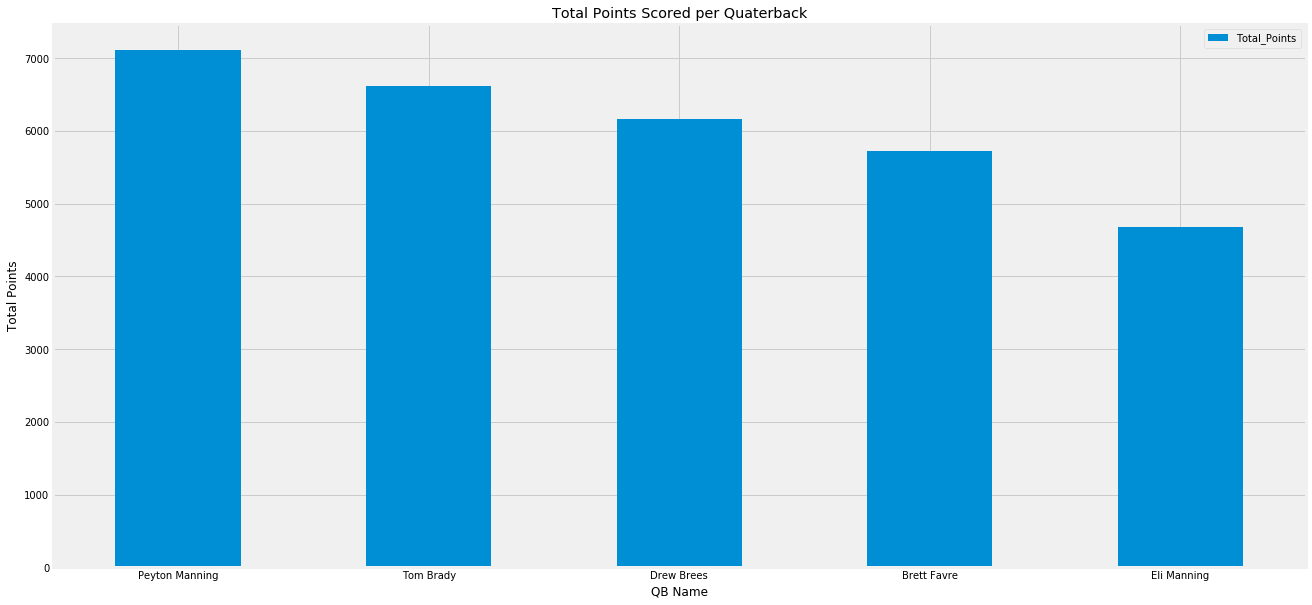

In [34]:
#Here is a bar chart plotting the total points scored for the top five QBs in the dataset

ax = top_five_total.sort_values('Total_Points', ascending = False).plot.bar(y='Total_Points', rot=0, figsize=(20,10))
plt.ylabel("Total Points")
plt.xlabel("QB Name")
plt.title("Total Points Scored per Quaterback");

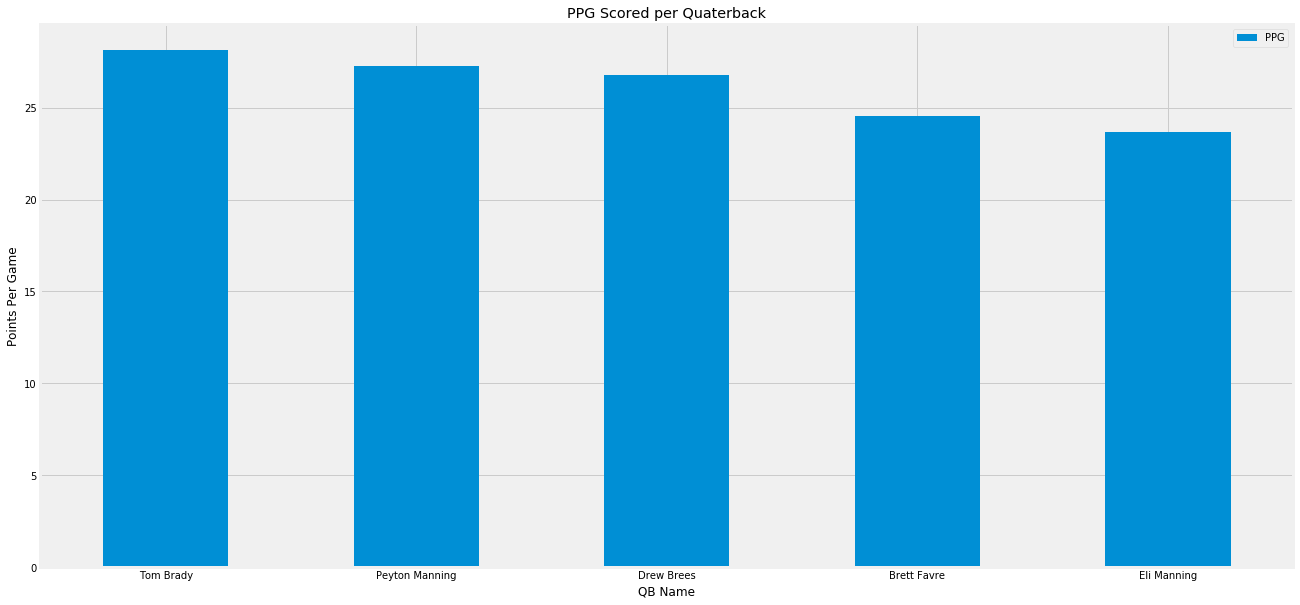

In [35]:
#Here is a bar chart plotting the PPG for the top five QBs in the dataset

ax = top_five_total.sort_values('PPG', ascending = False).plot.bar(y='PPG', rot=0, figsize=(20,10))
plt.ylabel("Points Per Game")
plt.xlabel("QB Name")
plt.title("PPG Scored per Quaterback");

In [36]:
#These are the QBs with the most PPG in the dataset
#There are some interesting values here
#For example, Steve Matthews and Tom Tupa clearly only played one game in this dataset
#They were succesful for that one game apparently 

qb_points.sort_values(by="PPG", ascending=False).head()

,Total_Points,PPG,Median_Points
qb,,,
Steve Matthews,40,40.000000,40.0
Joe Germaine,31,31.000000,31.0
John Elway,1222,28.418605,30.0
Tom Brady,6616,28.153191,28.0
Tom Tupa,28,28.000000,28.0


# Further Data Cleaning

I need to add categorical variables to my model. Before I convert them into dummy variables I should check how feasible they are to do that.

In [37]:
#Home and away is a classic binary outcome variable that can be used as a dummy variable. No need to change anything

qb_analysis['home_away'].value_counts()

home    5534
away    5521
Name: home_away, dtype: int64

In [38]:
#Here are the value counts for year
#There seems to be approximately the same amount of values per year

qb_analysis['year'].value_counts()

1999    546
2003    539
2007    538
2010    538
2009    535
2005    533
2002    529
1997    529
2004    528
2012    525
2016    524
2014    524
2015    523
2000    523
2011    522
1998    521
2008    520
2006    517
2001    517
1996    513
2013    511
Name: year, dtype: int64

In [39]:
#There are 21 unique values for year
#That's too many dummy variables
#I am going to convert years to time periods

qb_analysis['year'].nunique()

21

In [40]:
#Here I am creating a function to convert the years into four distinct eras 
#1996-1999 will be "Nineties_Era"
#2000-2005 will be "Early_2000s"
#2006-2010 will be "Late_2000s"
#2011 and above will be "Early_2010s"

def era_Played(x):
    if x in ["1996", "1997", '1998', '1999']:
        return "Nineties_Era"
    elif x in ["2000", "2001", '2002', '2003', '2004', '2005']:
        return "Early_2000s"
    elif x in ["2006", "2007", '2008', '2009', '2010']:
        return "Late_2000s"
    else: return "Early_2010s"


qb_analysis['year'] = qb_analysis['year'].apply(era_Played)
print(qb_analysis['year'])

0        Nineties_Era
1        Nineties_Era
3        Nineties_Era
4        Nineties_Era
5        Nineties_Era
6        Nineties_Era
7        Nineties_Era
9        Nineties_Era
10       Nineties_Era
11       Nineties_Era
12       Nineties_Era
13       Nineties_Era
14       Nineties_Era
15       Nineties_Era
16       Nineties_Era
17       Nineties_Era
20       Nineties_Era
21       Nineties_Era
23       Nineties_Era
24       Nineties_Era
25       Nineties_Era
26       Nineties_Era
27       Nineties_Era
29       Nineties_Era
30       Nineties_Era
31       Nineties_Era
33       Nineties_Era
34       Nineties_Era
36       Nineties_Era
37       Nineties_Era
             ...     
13144     Early_2010s
13145     Early_2010s
13146     Early_2010s
13147     Early_2010s
13149     Early_2010s
13150     Early_2010s
13151     Early_2010s
13152     Early_2010s
13153     Early_2010s
13154     Early_2010s
13155     Early_2010s
13157     Early_2010s
13159     Early_2010s
13160     Early_2010s
13163     

In [41]:
#Now there are just four unique values for year. Much better to use for dummy variables

qb_analysis['year'].value_counts()

Early_2000s     3169
Early_2010s     3129
Late_2000s      2648
Nineties_Era    2109
Name: year, dtype: int64

In [42]:
#Here I am dropping QB. There are too many QBs to convert into dummy variables
#We saw above which QBs had the most points scored, etc.

qb_analysis = qb_analysis.drop(['qb'], axis = 'columns')

In [43]:
#Here I am officially converting home_away and year into dummy variables

qb_analysis = pd.get_dummies(qb_analysis, columns=['home_away', 'year'], drop_first=True)

In [44]:
#There are 11,055 rows and 15 columns of data after a second round of cleaning

qb_analysis.shape

(11055, 15)

# Model With Dummy Variables

In [45]:
#Separating the variables between X and y

X = qb_analysis.drop('game_points', axis='columns')
y = qb_analysis.loc[:, 'game_points']

In [46]:
#Setting up a training set and a test set
#test_size = .2 means 20% of the data is set aside for the test set. 80% of the data is used for the training set
#You could also use train_size if you wish
#I am using the 80/20 split based on conventional use

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=30)

In [47]:
#Setting up a linear regression model using the training set

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
#Scoring the model on the training set and test set.
#These are the R-squared values for the training set and test set. 

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.5263993006250013
0.5636696361538573


#### First Impressions

The model improved by a significant amount with some removal of outliers and an addition of categorical variables. The training set and test set captured 53% and 56% of the variance respectively. The good news continues to be the lack of variance between the two sets. Our model is not overfitting while simultaneously is increasing in predictive power. 

# Checking for Collinearity

The good news is that the model has improved. The bad news is that we may need to remove some explanatory variables if there is strong evidence of collinearity.

In [49]:
#I am pulling just the numeric values

qb_analysis_numeric = qb_analysis.select_dtypes(['int64', 'float64', 'int32'])

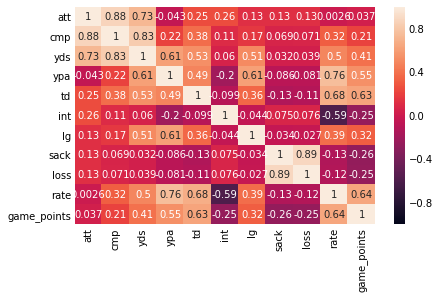

In [50]:
#There is extremely high correlation between attempts, completions, and yards
#There is extremely high correlation between rate, td, and ypa
#There is extremely high correlation between sack and loss
#Besides sacks, most of these variables are included in QB rating anyway
#You are essentially double counting. I figured that it would still be interesting to look at the data as a whole first

ax = sns.heatmap(qb_analysis_numeric.corr(), vmin = -1, vmax = 1, annot=True)

In [51]:
qb_analysis_numeric.corr().loc[:, 'game_points'].sort_values(ascending=False)

game_points    1.000000
rate           0.641681
td             0.633407
ypa            0.545576
yds            0.405596
lg             0.322106
cmp            0.213508
att            0.037217
loss          -0.250339
int           -0.250973
sack          -0.258005
Name: game_points, dtype: float64

In [52]:
#I am dropping the following variables because they are included in rating or not as strongly correlated with points


qb_analysis = qb_analysis.drop(['td', 'ypa', 'cmp', 'att', 'loss', 'yds', 'int'], axis = 'columns')

In [53]:
#There are 11,055 rows and 8 columns of data after checking for collinearity

qb_analysis.shape

(11055, 8)

# Data Visualization

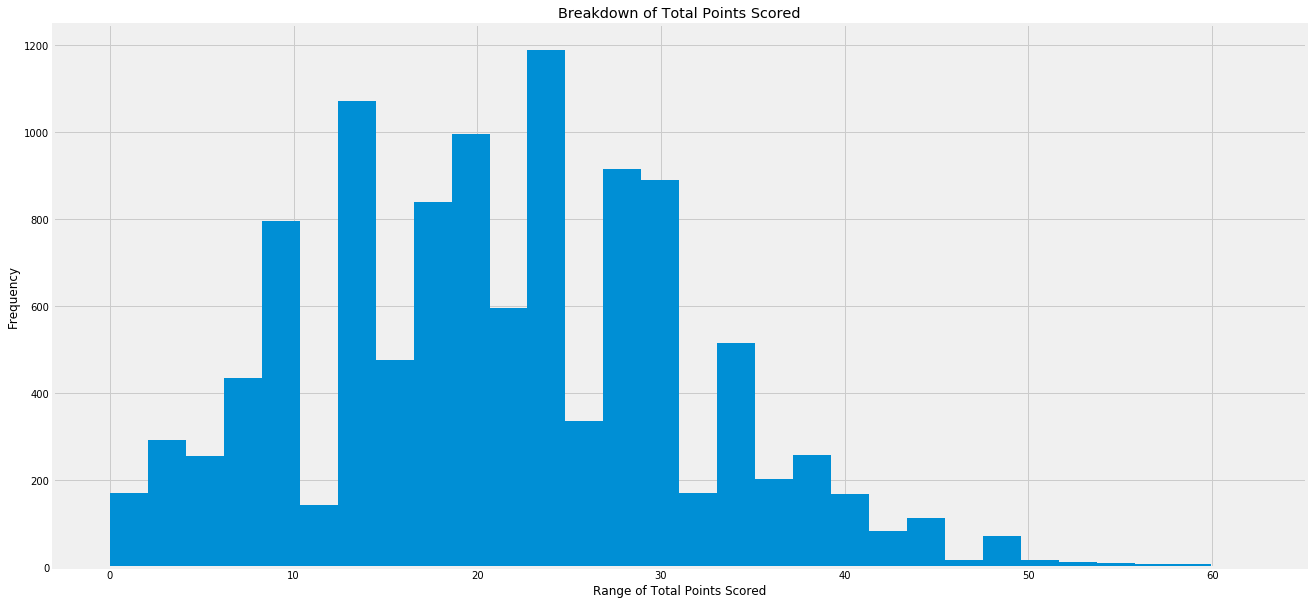

In [54]:
#Here is a histogram of game_points, the variable we are trying to predict
#This looks close enough to a normal distribution, maybe a slight right skew
#I am going to stick with this for now

qb_analysis.loc[:,"game_points"].plot(kind='hist', bins=30, rot=0, figsize=(20,10)) 
plt.xlabel("Range of Total Points Scored")
plt.title("Breakdown of Total Points Scored");

In [55]:
qb_analysis.corr().loc[:, 'game_points'].sort_values(ascending=False)

game_points          1.000000
rate                 0.641681
lg                   0.322106
home_away_home       0.120933
year_Early_2010s     0.079088
year_Late_2000s      0.000518
year_Nineties_Era   -0.044382
sack                -0.258005
Name: game_points, dtype: float64

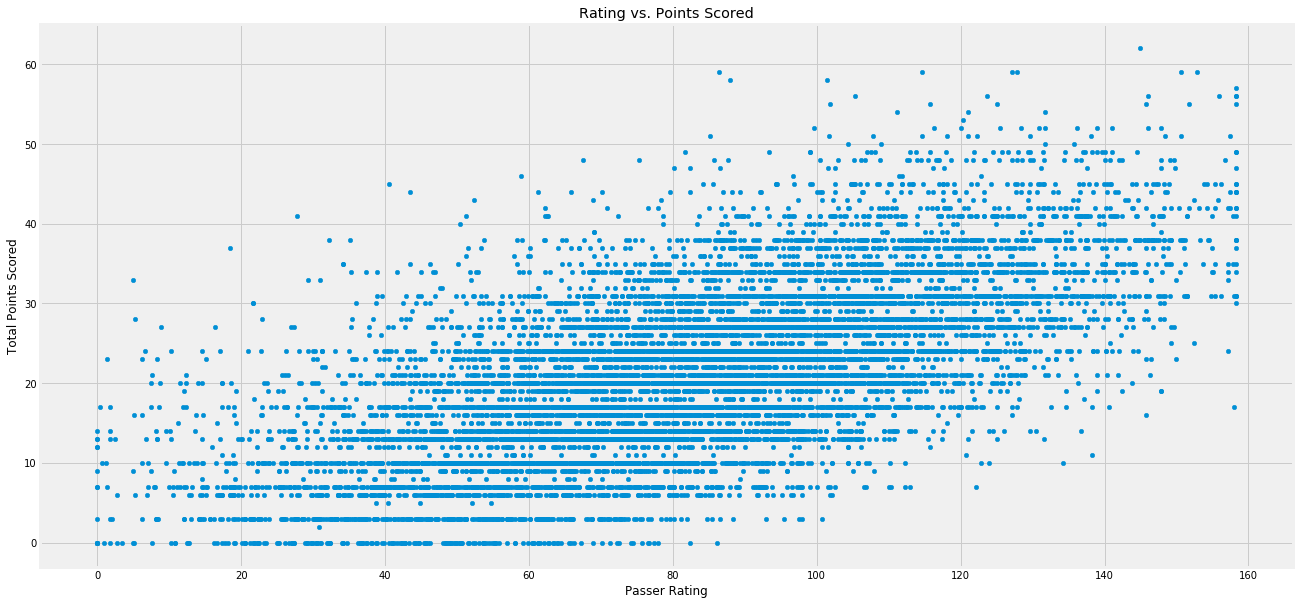

In [56]:
#There seems to be pretty clear positive correlation between QB rating and points scored

ax = qb_analysis.plot(kind='scatter', x='rate', y='game_points', rot=0, figsize=(20,10))
plt.ylabel("Total Points Scored")
plt.xlabel("Passer Rating")
plt.title("Rating vs. Points Scored");

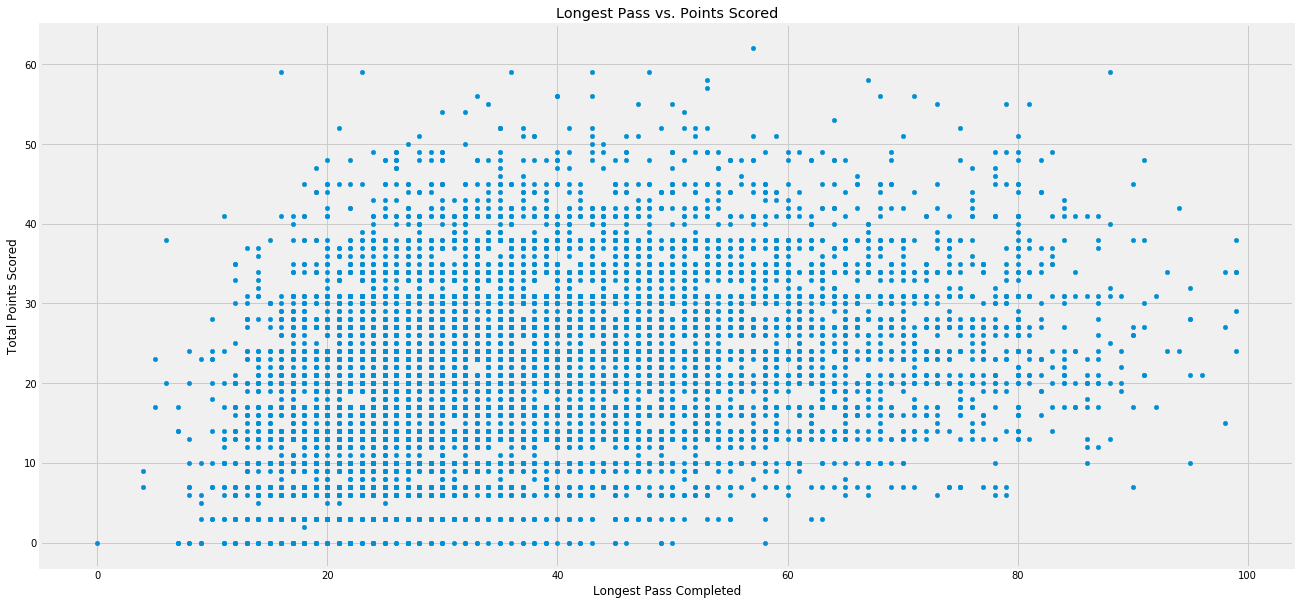

In [57]:
#There doesn't seem to be a clear relationship between longest completion and points scored

ax = qb_analysis.plot(kind='scatter', x='lg', y='game_points', rot=0, figsize=(20,10))
plt.ylabel("Total Points Scored")
plt.xlabel("Longest Pass Completed")
plt.title("Longest Pass vs. Points Scored");

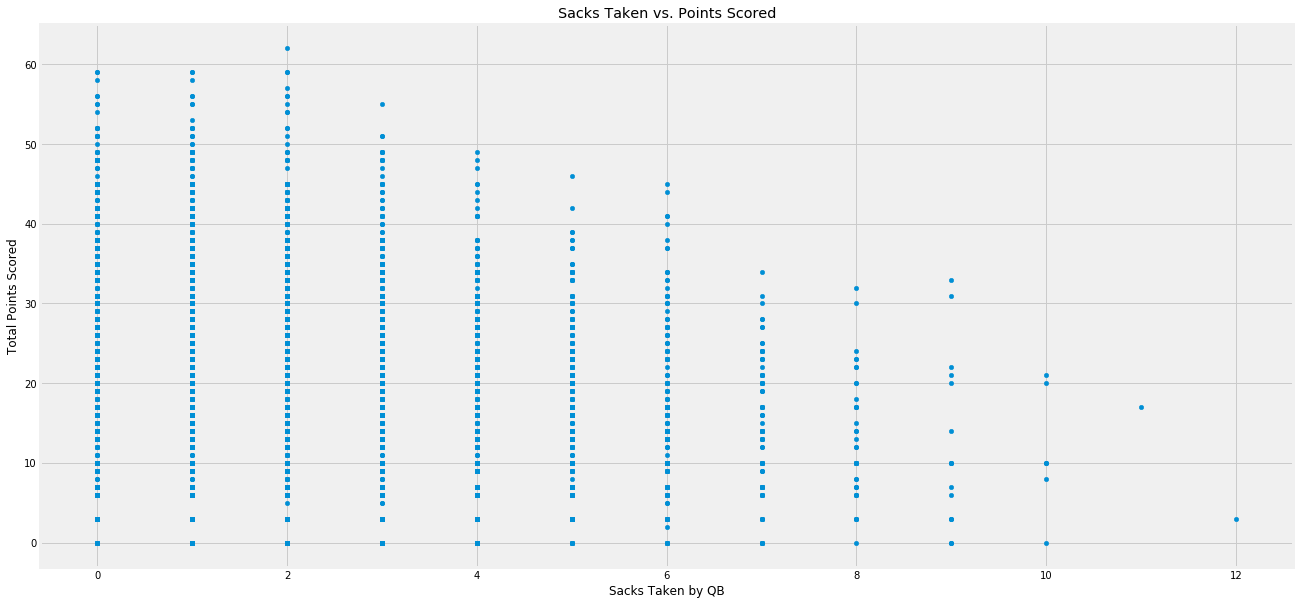

In [58]:
#There seems to be a slight negative relationship between sacks taken and points scored

ax = qb_analysis.plot(kind='scatter', x='sack', y='game_points', rot=0, figsize=(20,10))
plt.ylabel("Total Points Scored")
plt.xlabel("Sacks Taken by QB")
plt.title("Sacks Taken vs. Points Scored");

# Backwards Elimination

I believe it's important to narrow down the truly important variables when explaining outcomes. You could hypothetically keep adding variables and improve accuracy due to how R-Squared is calculated. We don't want that. We only want variables that we can truly focus on for future evaluation. Backwards elimination is my preferred method of determining the best explanatory variables.

In [59]:
#Separating the variables between X and y

X = qb_analysis.drop('game_points', axis='columns')
y = qb_analysis.loc[:, 'game_points']

In [60]:
#Here I am importing the stats model package that allows for OLS investigation

import statsmodels.api as sm

In [61]:
#Essentially we need a B0X0
#The stats model library is useful, but does not contain the constant column, hence why we add it

#This is specifically a column of 11055 "ones" since the constant will just multiply by one to keep its value
#The append function helps us add a new column to our dataset

X = np.append(arr =  np.ones((11055,1)).astype(int), values = X, axis = 1)

In [62]:
#The stats model has an OLS method that gives us a nice statistical summary of our model

regressor_OLS = sm.OLS(endog = y, exog = X).fit()

In [63]:
#Here is the OLS summary
#X5, X6, and X7 are not statistically significant at the 5% level

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            game_points   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     1321.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:10:39   Log-Likelihood:                -38121.
No. Observations:               11055   AIC:                         7.626e+04
Df Residuals:                   11047   BIC:                         7.632e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5807      0.294     12.171      0.000       3.004       4.157
x1             0.0578      0.005     11.713      0.000       0.048       0.067
x2            -1.1043      0.044    -25.342      0.000      -1.190      -1.019
x3             0.2074      0.003     74.669      0.000       0.202       0.213
x4             1.4968      0.145     10.303      0.000       1.212       1.782
x5             0.1817      0.193      0.941      0.347      -0.197       0.560
x6            -0.1635      0.201     -0.815      0.415      -0.557       0.230
x7             0.1644      0.214      0.768      0.442      -0.255       0.584
==============================================================================
Omnibus:                      299.220   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.154
Skew:                           0.392   Prob(JB):                     3.35e-72
Kurtosis:                       3.315   Cond. No.                         440.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
qb_analysis.head()

,lg,sack,rate,game_points,home_away_home,year_Early_2010s,year_Late_2000s,year_Nineties_Era
0,20,2.0,82.9,13,0,0,0,1
1,35,0.0,98.1,20,1,0,0,1
3,55,7.0,65.8,6,0,0,0,1
4,30,4.0,95.9,29,1,0,0,1
5,46,3.0,61.0,16,0,0,0,1


In [65]:
#The constant, B0

X[:, 0]

array([1., 1., 1., ..., 1., 1., 1.])

In [66]:
#X1 = longest throw

X[:, 1]

array([20., 35., 55., ..., 23., 42., 29.])

In [67]:
#X2 = Sacks taken

X[:, 2]

array([2., 0., 7., ..., 0., 1., 5.])

In [68]:
#X3 = Rating

X[:, 3]

array([ 82.9,  98.1,  65.8, ...,  75.4,  95.6, 122.3])

In [69]:
#X4 = Home vs. away

X[:, 4]

array([0., 1., 0., ..., 1., 0., 1.])

In [70]:
#X5 = year_Early_2010s

X[:, 5]

array([0., 0., 0., ..., 1., 1., 1.])

In [71]:
#X6 = year_Late_2000s

X[:, 6]

array([0., 0., 0., ..., 0., 0., 0.])

In [72]:
#X7 = year_Nineties_Era

X[:, 7]

array([1., 1., 1., ..., 0., 0., 0.])

In [73]:
#I am going to drop all eras from the dataset since none were significant
#I find this surprising since points have increased each era due to better rules for the offense

qb_analysis = qb_analysis.drop(['year_Early_2010s', 'year_Late_2000s', 'year_Nineties_Era'], axis = 'columns')

In [74]:
qb_analysis.head()

,lg,sack,rate,game_points,home_away_home
0,20,2.0,82.9,13,0
1,35,0.0,98.1,20,1
3,55,7.0,65.8,6,0
4,30,4.0,95.9,29,1
5,46,3.0,61.0,16,0


# Random Forest Regression

Lots of people rush directly to XGBoost regression and I don't blame them. It's an extremely useful tool. I don't like going straight to it because I think it may hide some things you need to tweak in your model. I am going to run a Random Forest regression first.

In [75]:
#Separating the variables between X and y

X = qb_analysis.drop('game_points', axis='columns')
y = qb_analysis.loc[:, 'game_points']

In [76]:
#Setting up a training set and a test set
#test_size = .2 means 20% of the data is set aside for the test set. 80% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=30)

In [77]:
#Importing the Random Forest module

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [78]:
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9061815695742111
0.4049390474433808


#### First Impressions

There is massive overfitting in this iteration of Random Forest regression. I will simply move on to XGBoost. 

# XGBoost Regression

Alas, the best choice might be just to use XGBoost. I have implemented it below

In [79]:
#Separating the variables between X and y

X = qb_analysis.drop('game_points', axis='columns')
y = qb_analysis.loc[:, 'game_points']

In [80]:
#Setting up a training set and a test set
#test_size = .2 means 20% of the data is set aside for the test set. 80% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=30)

In [81]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()

In [82]:
xgb_reg.fit(X_train, y_train)

[13:10:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [83]:
print(xgb_reg.score(X_train, y_train))
print(xgb_reg.score(X_test, y_test))

0.47483380105032447
0.48442795372761954


#### First Impressions

While it may seem like a disappointment to have this model's R-Squared values to be less than the last linear regression model, we need to take into account our elimination of redundant variables. There's no point in having unnecessary variables in our model just to boost our predictive power. We want the variables that actually explain outcomes

In [84]:
qb_analysis.head()

,lg,sack,rate,game_points,home_away_home
0,20,2.0,82.9,13,0
1,35,0.0,98.1,20,1
3,55,7.0,65.8,6,0
4,30,4.0,95.9,29,1
5,46,3.0,61.0,16,0


# Final Thoughts

#### Overall Variables Used to Determine Total Points in a Football Game

1. Whether a game is at home or away

2. The passer rating of the quarterback

3. The longest completion thrown during the game

4. The amount of sacks taken by the quarterback during the game

In [85]:
#Here is a much better visualization of the most important features in the XGBoost model

import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

[13:10:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


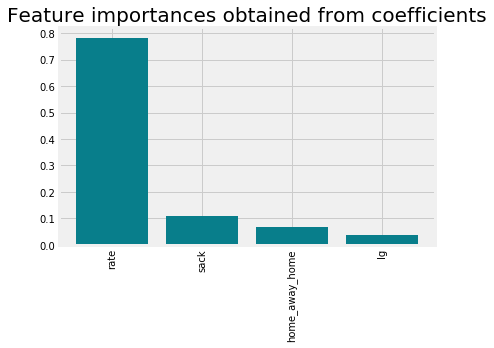

In [86]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Clearly passer rating has the most significance when it comes to predicting total points scored for the team. I would not put too much emphasis on this model and it's outcomes. The dataset was simple. It would be interesting to use this dataset to predict things like wins and losses or MVP voting. I am not denying the significance of passer rating. If a QB has a high passer rating, he is most likely putting his offense in position to score points, whether that be by pass, run, or special teams. 